In [2]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm

p1, p2 = Point3D(1,0,0), Point3D(5,3,2)
L1 = Line(p1, p2)
print(L1.equation())
print("x,y,z =",L1.arbitrary_point())
a = np.cross([-3,4,0], [-1,0,2])
print(a / 2)

(-3*x + 4*y + 3, -x + 2*z + 1)
x,y,z = Point3D(4*t + 1, 3*t, 2*t)
[4. 3. 2.]


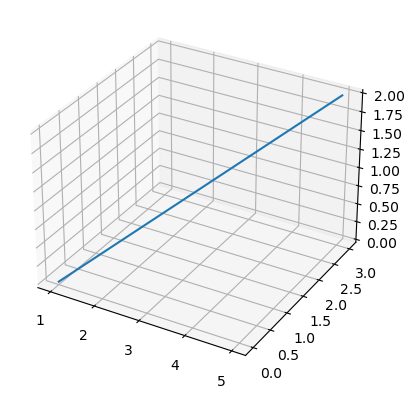

In [9]:
ax = plt.axes(projection='3d')
x = np.array([1,5])
y = np.array([0,3])
z = np.array([0,2])
ax.plot(x,y,z)
plt.show()

In [13]:
#x + 2y - 3z + 2 = 0
#2x - 2y + z - 5 = 0

# Пусть z = 0:
# x + 2y + 2 = 0
# 2x - 2y - 5 = 0
a = np.array([[1,2],[2,-2]])
b = np.array([-2,5])
x = np.linalg.inv(a).dot(b)
###print(x)
# => M(1, -1.5, 0)

# [norm_1, norm_2] - направляющая
n1 = np.array([1,2,-3])
n2 = np.array([2,-2,1])
q = np.cross(n1,n2)
print(q)

d = Plane(Point3D(0,-1,0), normal_vector=(1,2,-3))
e = Plane(Point3D(0,0,5), normal_vector=(2,-2,1))
d.intersection(e)

[-4 -7 -6]


[Line3D(Point3D(1, -3/2, 0), Point3D(-3, -17/2, -6))]

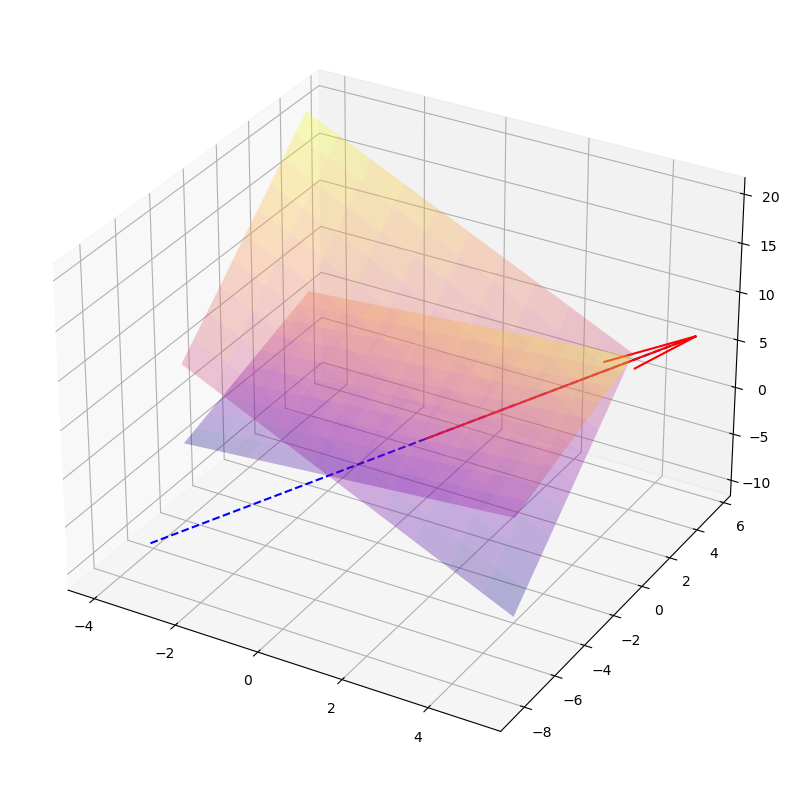

In [22]:
A1, B1, C1, D1 = 1,2,-3,2
A2, B2, C2, D2 = 2,-2,1,-5

f1 = lambda x,y: (-A1 * x - B1 * y - D1) / C1
f2 = lambda x,y: (-A2 * x - B2 * y - D2) / C2

fig = plt.figure( figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
xval = np.linspace(-4,4,100)
yval = np.linspace(-4,4,100)
x,y = np.meshgrid(xval, yval)
z1 = f1(x,y)
surf = ax.plot_surface(x,y,z1, rstride=10, 
    cstride=10, cmap=cm.plasma).set_alpha(0.3) # ПРОЗРАЧНОСТЬ
z2 = f2(x,y)
surf = ax.plot_surface(x,y,z2, rstride=10, 
    cstride=10, cmap=cm.plasma).set_alpha(0.3)

p = np.array([1, -1.5, 0]) # ТОЧКА
v = np.array([4,7,6])      # НАПРАВЛЯЮЩАЯ
ax.quiver(*p, *v, color='Red')
ax.plot([1, 5], [-1.5, 5.5], [0,6], '--', color='Blue') # v - p # не видно на рисунке
ax.plot([1,-3], [-1.5,-8.5], [0,-6], '--', color='Blue')# p - v # вторая часть прямой

In [20]:
''' 1)
L: x = -1 + 2t, y = 2 - 4t, z = t
M(2, -1, -3)
Найти ур-ие прямой, проходящей через точку М, параллельно L
Найти ур-ие плоскости, содержащей обе эти прямые
'''
# 2x - 4y + z + 1 = 0
# 3x + y + 2z + 1 = 0
L = Line( Point3D(-1,2,0), Point3D(1,-2,1))
print(L.arbitrary_point())
print(L.equation())
a = np.cross([2,1,0], [-1,0,2])
print(a)
L1 = L.parallel_line(Point(2,-1,3))
print('ОТВЕТ №1')
print(L1.equation())

print('ОТВЕТ №2')
p4 = Point3D(2, -4, 0)
p1, p2, p3 = Point3D(0,3,0), Point3D(1,1,0), Point3D(1,-2, 0)
P = Plane(p1, p2, p4)
print(P.equation())

p1, p2, p3 = Point3D(0,0,2), Point3D(-4,0,0), Point3D(1,-2, 0)
P = Plane(p1, p2, p3)
print(P.equation()/2)

Point3D(2*t - 1, 2 - 4*t, t)
(2*x + y, -x + 2*z - 1)
[ 2 -4  1]
ОТВЕТ №1
(2*x + y - 3, -x + 2*z - 4)
ОТВЕТ №2
-3*z
-2*x - 5*y + 4*z - 8


In [42]:
''' 2)
Найти величину острого угла в градусах между прямыми L1, L2
L1: x - y + 2z - 8 = 0, 2x + y - z + 3 = 0
L2: (x - 4) / -3 = (y + 1) / 1 = (z - 5) / -2
'''
# L2 => {
# x = -3t + 4
# y =   t - 1
# z =  2t + 5
# }
# => t = y + 1 =>
# {
# x = -3(y + 1) + 4 => x + 3y - 1 = 0
# z =  2(y + 1) + 5 => -2y + z - 2 = 0
# }
L1 = Line( Point(10, 8, 3), Point(12, 6, 1)) #L1 = Line( Point(0,0,4), Point(8,0,0))
print(L1.equation())
L2 = Line( Point(1,0,3), Point(-2,1,1))#L2 = Line( Point(1,0,0), Point(7, -2, 0))
print(L2.equation())
print(L1.angle_between(L2)) # acos(3*sqrt(2)/5)
'''
L1 = Line( Point(5, 4, 3.5), Point(12, 6, 1))
print(L1.equation())
L2 = Line( Point(-2,1,0), Point(7, -2, 0))
print(L2.equation())
print(L1.angle_between(L2))

L1 = Line( Point(1,1,0), Point(0,4,1))
print(L1.equation())
L2 = Line( Point(1,0,0), Point(7, -2, 0))
print(L2.equation())
print(L1.angle_between(L2)) # acos(-3*sqrt(110)/55)

L1 = Line( Point(1,1,0), Point(0,4,1))
print(L1.equation())
L2 = Line( Point(0,0,2), Point(0,1,4))
print(L2.equation())
print(L1.angle_between(L2)) # acos(sqrt(55)/11)
'''

(x + y - 18, x + z - 13)
(x + 3*y - 1, -2*x + 3*z - 7)
acos(-sqrt(42)/21)


'\nL1 = Line( Point(5, 4, 3.5), Point(12, 6, 1))\nprint(L1.equation())\nL2 = Line( Point(-2,1,0), Point(7, -2, 0))\nprint(L2.equation())\nprint(L1.angle_between(L2))\n\nL1 = Line( Point(1,1,0), Point(0,4,1))\nprint(L1.equation())\nL2 = Line( Point(1,0,0), Point(7, -2, 0))\nprint(L2.equation())\nprint(L1.angle_between(L2)) # acos(-3*sqrt(110)/55)\n\nL1 = Line( Point(1,1,0), Point(0,4,1))\nprint(L1.equation())\nL2 = Line( Point(0,0,2), Point(0,1,4))\nprint(L2.equation())\nprint(L1.angle_between(L2)) # acos(sqrt(55)/11)\n'

In [3]:
''' 3)
Найти расстояние между прямыми
L1: (x - 2) / 3  = (y + 1) / 4 = z / 2        
L2: (x - 4) / -3 = (y + 1) / 1 = (z - 5) / -2
'''
L1 = Line( Point(5,3,2), Point(8,7,4))
L2 = Line( Point(1,0,3), Point(-2,1,1))
print(L1.equation(), '\n', L2.equation())
d = L1.distance(L2.points[1])
print(d)

(-4*x + 3*y + 11, -2*x + 3*z + 4) 
 (x + 3*y - 1, -2*x + 3*z - 7)
11*sqrt(145)/29
